In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv('E:\\LEARNBAY\\Projects\\May\\House Price.csv')
df.head()

,Id,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   Alley        91 non-null     object 
 4   MasVnrArea   1452 non-null   float64
 5   1stFlrSF     1460 non-null   int64  
 6   2ndFlrSF     1460 non-null   int64  
 7   GrLivArea    1460 non-null   int64  
 8   GarageType   1379 non-null   object 
 9   GarageArea   1460 non-null   int64  
 10  SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 125.6+ KB


# Pre-Processing Of data

In [94]:
# 1. Missing Data

df.isnull().sum()/len(df)*100

Id              0.000000
LotFrontage    17.739726
LotArea         0.000000
Alley          93.767123
MasVnrArea      0.547945
1stFlrSF        0.000000
2ndFlrSF        0.000000
GrLivArea       0.000000
GarageType      5.547945
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

25% missing data is okay...we can always fill it...but beyond that we can think of deleting that feature. 

We can see that Alley has almost 94% missing data. We can delete that.

LotFrontage and GarageType -- are the ones which needs to be seen.

In [140]:
# Also deteing ID .,...as it will not contribute towards the analysis. 

df = df.drop(['Alley','Id'],axis=1)

In [96]:
df.head(1)

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,65.0,8450,196.0,856,854,1710,Attchd,548,208500


In [97]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [98]:
df['LotFrontage'] = df['LotFrontage'].fillna(60.0) 
df.isnull().sum()

LotFrontage     0
LotArea         0
MasVnrArea      8
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
GarageType     81
GarageArea      0
SalePrice       0
dtype: int64

In [99]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [100]:
df['GarageType'] = df['GarageType'].fillna('Attchd')

In [101]:
df['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [102]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

In [103]:
df.isnull().sum()/len(df)*100

LotFrontage    0.0
LotArea        0.0
MasVnrArea     0.0
1stFlrSF       0.0
2ndFlrSF       0.0
GrLivArea      0.0
GarageType     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

In [104]:
# 2. Outliers

df.describe()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,103.117123,1162.626712,346.992466,1515.463699,472.980137,180921.195890
std,22.356355,9981.264932,180.731373,386.587738,436.528436,525.480383,213.804841,79442.502883
min,21.000000,1300.000000,0.000000,334.000000,0.000000,334.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,882.000000,0.000000,1129.500000,334.500000,129975.000000
50%,63.000000,9478.500000,0.000000,1087.000000,0.000000,1464.000000,480.000000,163000.000000
75%,79.000000,11601.500000,164.250000,1391.250000,728.000000,1776.750000,576.000000,214000.000000
max,313.000000,215245.000000,1600.000000,4692.000000,2065.000000,5642.000000,1418.000000,755000.000000


No much outliers...all values much in range. 

In [105]:
# 3. Encoding

# Only one object datatype is there - GarageType
# Will encode after EDA.

In [106]:
# 4. No imbalance data check 0- as it is regression problem.
# 5. Feature scaling after EDA.

# EDA

In [107]:
for i in df.columns:
    print()
    print("**********",i,"*************")
    print(set(df[i].tolist()))
    print("*************************************************************")


********** LotFrontage *************
{21.0, 24.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 124.0, 128.0, 129.0, 130.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 160.0, 168.0, 174.0, 182.0, 313.0}
*************************************************************

********** LotArea *************
{10240, 8197, 8198, 8199, 8200, 10246, 6155, 18450, 8212, 10261, 4118, 10264, 28698, 10267, 14364, 6173, 6171, 4130, 6180, 12327, 14375, 12328, 8235, 10289, 8244, 824

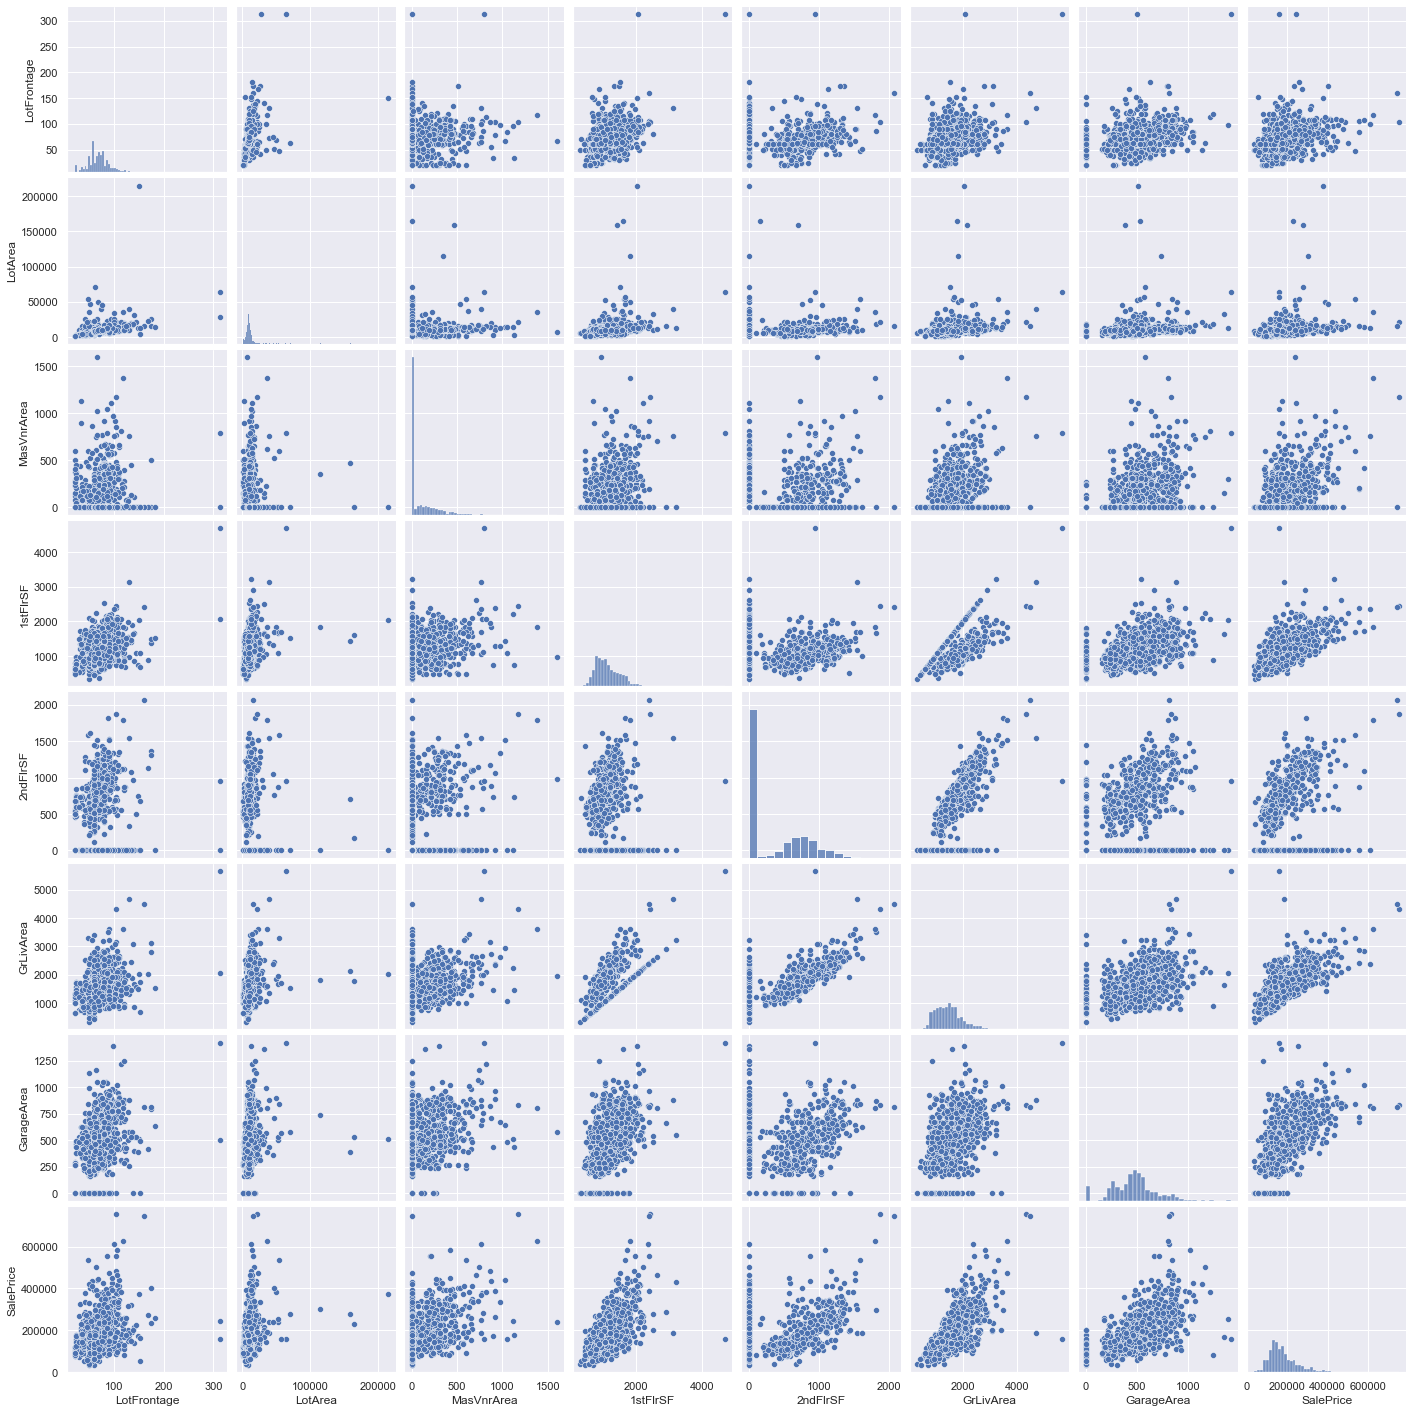

In [141]:
sns.pairplot(df)

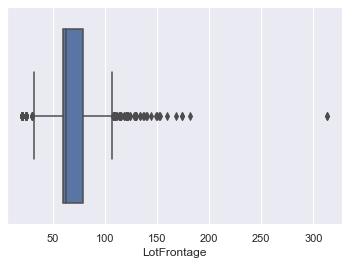

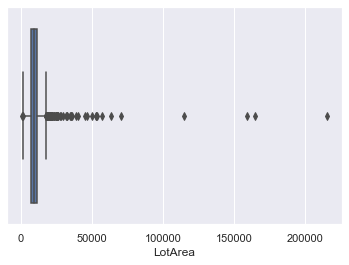

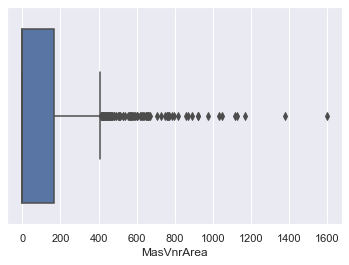

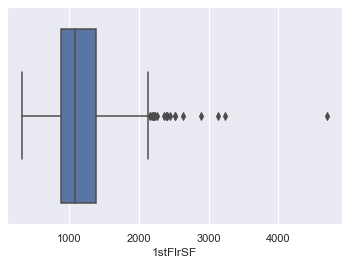

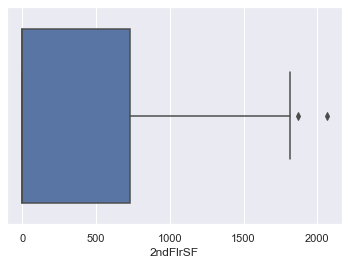

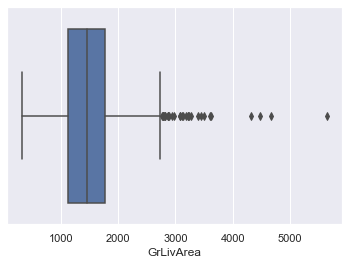

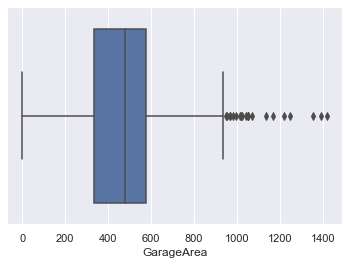

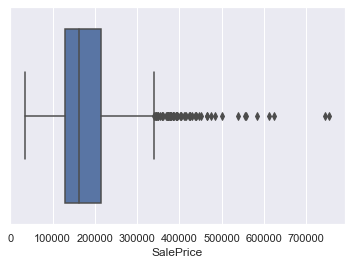

In [108]:
def box(i):
    sns.boxplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude = 'object'):
    box(i)

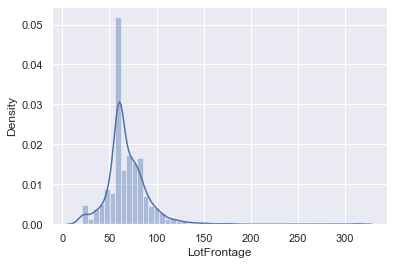

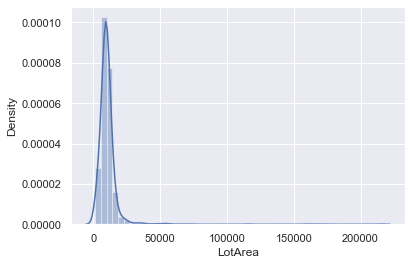

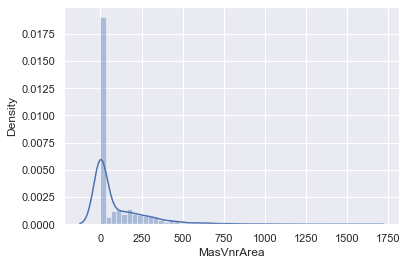

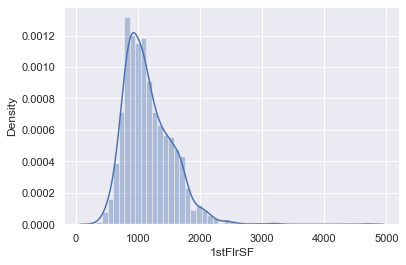

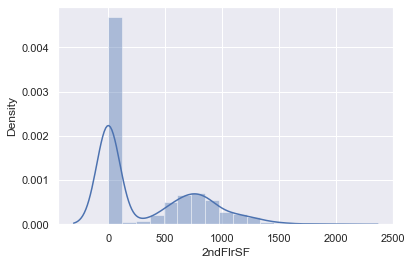

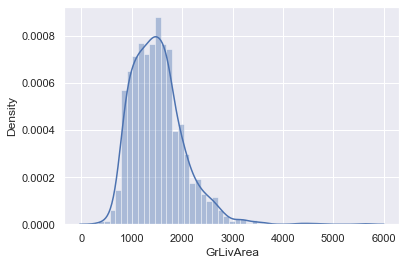

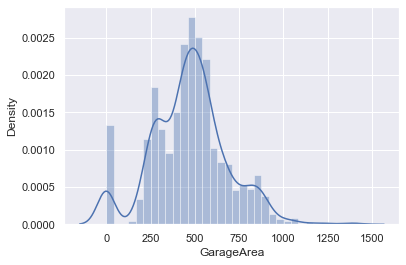

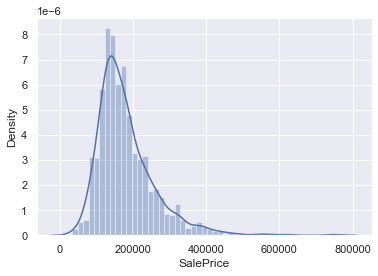

In [109]:
def dist(i):
    sns.distplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude='object').columns:
    dist(i)

<AxesSubplot:>

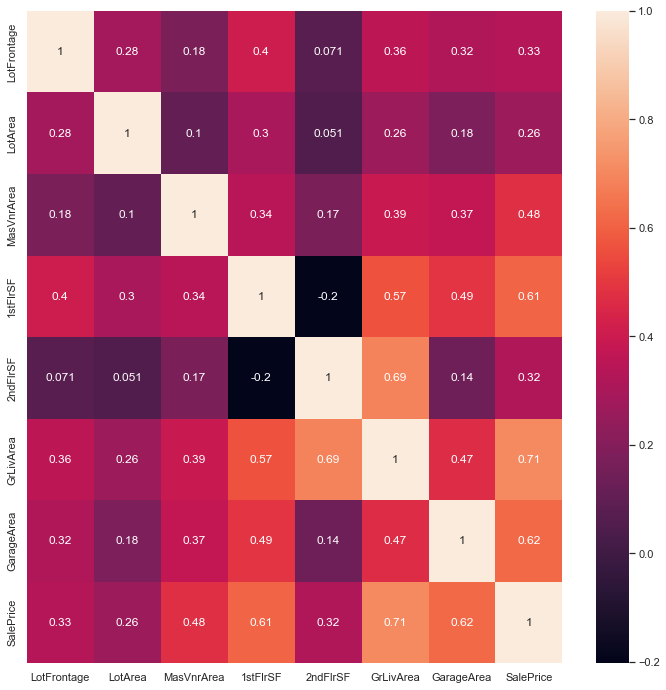

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [110]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_file("House_Price.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA ENDS...

### OBSERVATIONS
1. Not much outliers seen in the box plots.
2. All the features are normally distributed
3. No highly correlated features. 
4. Panda Profile report generated. 

In [111]:
# Encoding

df = pd.get_dummies(df,columns=['GarageType'],drop_first=True)
df.head(1)

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,65.0,8450,196.0,856,854,1710,548,208500,1,0,0,0,0


In [112]:
# SPlIting the data into DV and IDV 

x = df.drop(columns=['SalePrice'],axis=1)
y = df['SalePrice']

In [113]:
x

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,65.0,8450,196.0,856,854,1710,548,1,0,0,0,0
1,80.0,9600,0.0,1262,0,1262,460,1,0,0,0,0
2,68.0,11250,162.0,920,866,1786,608,1,0,0,0,0
3,60.0,9550,0.0,961,756,1717,642,0,0,0,0,1
4,84.0,14260,350.0,1145,1053,2198,836,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,953,694,1647,460,1,0,0,0,0
1456,85.0,13175,119.0,2073,0,2073,500,1,0,0,0,0
1457,66.0,9042,0.0,1188,1152,2340,252,1,0,0,0,0
1458,68.0,9717,0.0,1078,0,1078,240,1,0,0,0,0


In [114]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [115]:
# FEATURE SCALING

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-0.14618854, -0.20714171,  0.51410389, ..., -0.25325865,
        -0.07875671, -0.60055892],
       [ 0.52499153, -0.09188637, -0.57075013, ..., -0.25325865,
        -0.07875671, -0.60055892],
       [-0.01195252,  0.07347998,  0.32591493, ..., -0.25325865,
        -0.07875671, -0.60055892],
       ...,
       [-0.1014432 , -0.14781027, -0.57075013, ..., -0.25325865,
        -0.07875671, -0.60055892],
       [-0.01195252, -0.08016039, -0.57075013, ..., -0.25325865,
        -0.07875671, -0.60055892],
       [ 0.30126484, -0.05811155, -0.57075013, ..., -0.25325865,
        -0.07875671, -0.60055892]])

# SPliting in training and testing datasets.

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test = train_test_split(sc_x,y,test_size=0.2,random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1168, 12) (292, 12) (1168,) (292,)


# BUILDING LEINEAR REGRESSION MODEL

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [123]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [126]:
y_pred_test = lr.predict(x_test)

In [127]:
r2_score(y_test,y_pred_test)

0.5458100861615776

In [ ]:
THe score is very bad. We will try and see the OLS Method. 

# OLS METHOD 

In [131]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [133]:
ols = smf.OLS(endog = y_train,exog=x_train).fit()
y_pred_ols = ols.predict(x_test)

In [134]:
ols.summary() # on scaled data. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.109
Method:                 Least Squares   F-statistic:                              12.92
Date:                Wed, 17 May 2023   Prob (F-statistic):                    3.51e-25
Time:                        14:46:09   Log-Likelihood:                         -15823.
No. Observations:                1168   AIC:                                  3.167e+04
Df Residuals:                    1156   BIC:                                  3.173e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3814.5302   6430.106     -0.593      0.553   -1.64e+04    8801.455
x2          5575.8382   5378.332      1.037      0.300   -4976.548    1.61e+04
x3          1.067e+04   6055.270      1.761      0.078   -1215.171    2.25e+04
x4          1.485e+04   4.29e+04      0.346      0.729   -6.93e+04     9.9e+04
x5          1436.7516   4.82e+04      0.030      0.976   -9.31e+04     9.6e+04
x6           2.97e+04   5.67e+04      0.523      0.601   -8.16e+04    1.41e+05
x7          2.547e+04   6980.613      3.648      0.000    1.18e+04    3.92e+04
x8          3.414e+04    3.7e+04      0.924      0.356   -3.84e+04    1.07e+05
x9          2543.3687   1.04e+04      0.244      0.808   -1.79e+04     2.3e+04
x10         2.261e+04   1.92e+04      1.178      0.239    -1.5e+04    6.03e+04
x11        -4458.8265   8904.967     -0.501      0.617   -2.19e+04     1.3e+04
x12         2.257e+04   3.44e+04      0.656      0.512    -4.5e+04    9.01e+04
==============================================================================
Omnibus:                      209.726   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4316.308
Skew:                           0.091   Prob(JB):                         0.00
Kurtosis:                      12.416   Cond. No.                         26.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

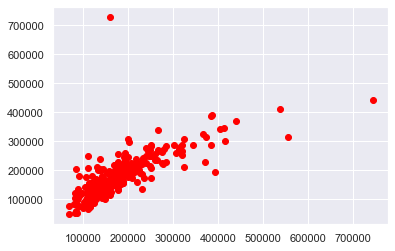

In [138]:
plt.scatter(y_test,y_pred_test,color='red')

In [ ]:
Observations:
    
1. Normal DIstribution of IDV and DVs. 
2. Homoscadasicity - predicted-actual distance should be smae ...if not outlier treatment will be done.
3. Normality - Q-Q plot above shows that the residuals are placed fine. 
4. Durbin watson test is bad ... it shows autocorrelation problem. Seeing the p-values, it is furthermore bad. 
We need to do another test or need to check the data. 
5. Endoginty is fine...we took DV correct. 
6. p-value should be less than 0.005 but except for 'x7' feature all have value more than 0.05. None of the values are showing good result. 
7. Correlation matrix was checked and there was not much correlation found. 
8. Adjusted r-2 value is very very low. 

Not a good model. 

In [143]:
# Just checking other evaluation matrix as well:

from sklearn import metrics

print("Mean Squared Error - ",metrics.mean_squared_error(y_test,y_pred_test))
print("Mean Squared Error - ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print("Mean Squared Error - ",metrics.mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error - ",metrics.mean_absolute_error(y_test,y_pred_test)*100)

Mean Squared Error -  3136567400.131851
Mean Squared Error -  56005.06584347394
Mean Squared Error -  30994.750456217145
Mean Squared Error -  3099475.0456217146


This reults are also not very good... 

MSE = (actual - predicted)^2
The actual value and predicted value seem to be very very far. 

Not a good model. 

# DONE